![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png)  ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
# PEC M5 Análisis de datos estructurados con Spark (4 Dic 2024 - 31 Dic 2024)

## Extracción de conocimiento de fuentes de datos heterogéneas mediante Spark SQL, RDDs

En esta PEC introduciremos estructuras de datos más complejas que las vistas hasta ahora, donde los campos pueden tener otros campos anidados. Utilizaremos los datos de IMDB (https://www.imdb.com/) sobre películas. Específicamente utilizaremos unos archivos sobre 'reviews' de películas realizados por un conjunto de usuarios y sobre estos archivos realizaremos una serie de operaciones mediante SparkSQL y Dataframes.

Realizaremos un conjunto de preguntas sobre los archivos que puede ir respondiendo de forma secuencial.<br>
A lo largo del ejercicio veréis espacios con:
````
<FILL_IN>
````
Devbéis completar estos espacios con los contenidos que se piden.





## 1. Inicialización del entorno y carga de archivos (2 puntos)

Es necesario cargar el entorno de trabajo inicializando SparkContext.

In [3]:
import findspark
findspark.init()
import pyspark
import random
sc = pyspark.SparkContext(master="local[1]", appName="xcastanoa")

In [9]:

from pyspark import SparkConf, SparkContext, SQLContext, HiveContext
from pyspark.sql import Row

In [10]:
sqlContext = SQLContext(sc)

### 1.1 Carga de archivos de HDFS

Los archivos se encuentran en HDFS, en la ubicación /aula_B0.485/data.
Aquí encontrará una serie de directorios.

* /aula_B0.485/data/movie_details-p4.json, datos con 4 particiones
* /aula_B0.485/data/movie_details.json, datos particionados por movie_id
* /aula_B0.485/data/reviews-p4.json, datos con 4 particiones
* /aula_B0.485/data/reviews.json, datos particionados por rating

Mediante los pedidos trabajados en la primera PAC, explore que tiene en cada directorio.
(NOTA: puede añadir tantas celdas como necesite)


In [11]:
!hdfs dfs -ls /aula_B0.485/data/movie_details-p4.json

Found 5 items
-rw-r--r--   2 cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details-p4.json/_SUCCESS
-rw-r--r--   2 cesc supergroup    3598049 2024-12-04 16:50 /aula_B0.485/data/movie_details-p4.json/part-00000-56a27bb0-9e7f-48c0-b648-4ffa919558ec-c000.json
-rw-r--r--   2 cesc supergroup    3448420 2024-12-04 16:50 /aula_B0.485/data/movie_details-p4.json/part-00001-56a27bb0-9e7f-48c0-b648-4ffa919558ec-c000.json
-rw-r--r--   2 cesc supergroup    3512848 2024-12-04 16:50 /aula_B0.485/data/movie_details-p4.json/part-00002-56a27bb0-9e7f-48c0-b648-4ffa919558ec-c000.json
-rw-r--r--   2 cesc supergroup    3593174 2024-12-04 16:50 /aula_B0.485/data/movie_details-p4.json/part-00003-56a27bb0-9e7f-48c0-b648-4ffa919558ec-c000.json


In [12]:
!hdfs dfs -ls /aula_B0.485/data/movie_details.json

Found 1571 items
-rw-r--r--   2 cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/_SUCCESS
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0012349
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0015864
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0017136
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0017925
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0018455
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0019254
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/data/movie_details.json/movie_id=tt0021749
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:50 /aula_B0.485/d

In [13]:
!hdfs dfs -ls /aula_B0.485/data/reviews-p4.json

Found 5 items
-rw-r--r--   2 cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews-p4.json/_SUCCESS
-rw-r--r--   2 cesc supergroup  236266182 2024-12-04 16:52 /aula_B0.485/data/reviews-p4.json/part-00000-b572700e-3c18-474b-aa74-9405b7a55060-c000.json
-rw-r--r--   2 cesc supergroup  235770827 2024-12-04 16:52 /aula_B0.485/data/reviews-p4.json/part-00001-b572700e-3c18-474b-aa74-9405b7a55060-c000.json
-rw-r--r--   2 cesc supergroup  235751558 2024-12-04 16:52 /aula_B0.485/data/reviews-p4.json/part-00002-b572700e-3c18-474b-aa74-9405b7a55060-c000.json
-rw-r--r--   2 cesc supergroup  236169289 2024-12-04 16:52 /aula_B0.485/data/reviews-p4.json/part-00003-b572700e-3c18-474b-aa74-9405b7a55060-c000.json


In [14]:
!hdfs dfs -ls /aula_B0.485/data/reviews.json

Found 11 items
-rw-r--r--   2 cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/_SUCCESS
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=1
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=10
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=2
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=3
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=4
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=5
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=6
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rating=7
drwxr-xr-x   - cesc supergroup          0 2024-12-04 16:52 /aula_B0.485/data/reviews.json/rat

Mediante el comando hdfs fsck verifica el número de block de cada directorio para entender que existe en cada directorio. Recuerde que son 4 directorios.

In [15]:
!hdfs fsck /aula_B0.485/data/movie_details-p4.json

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=xcastanoa&path=%2Faula_B0.485%2Fdata%2Fmovie_details-p4.json
FSCK started by xcastanoa (auth:SIMPLE) from /213.73.35.120 for path /aula_B0.485/data/movie_details-p4.json at Thu Dec 26 12:14:33 CET 2024

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			1
 Total symlinks:		0

Replicated Blocks:
 Total size:	14152491 B
 Total files:	5
 Total blocks (validated):	4 (avg. block size 3538122 B)
 Minimally replicated blocks:	4 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	2
 Average block replication:	2.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0
 Under-erasure-coded

In [16]:
!hdfs fsck /aula_B0.485/data/movie_details.json

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=xcastanoa&path=%2Faula_B0.485%2Fdata%2Fmovie_details.json
FSCK started by xcastanoa (auth:SIMPLE) from /213.73.35.120 for path /aula_B0.485/data/movie_details.json at Thu Dec 26 12:14:39 CET 2024

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			1571
 Total symlinks:		0

Replicated Blocks:
 Total size:	14116381 B
 Total files:	1571
 Total blocks (validated):	1570 (avg. block size 8991 B)
 Minimally replicated blocks:	1570 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	2
 Average block replication:	2.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0
 Under-erasure-co

In [17]:
!hdfs fsck /aula_B0.485/data/reviews-p4.json

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=xcastanoa&path=%2Faula_B0.485%2Fdata%2Freviews-p4.json
FSCK started by xcastanoa (auth:SIMPLE) from /213.73.35.120 for path /aula_B0.485/data/reviews-p4.json at Thu Dec 26 12:14:42 CET 2024

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			1
 Total symlinks:		0

Replicated Blocks:
 Total size:	943957856 B
 Total files:	5
 Total blocks (validated):	8 (avg. block size 117994732 B)
 Minimally replicated blocks:	8 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	2
 Average block replication:	2.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0
 Under-erasure-coded block gr

In [18]:
!hdfs fsck /aula_B0.485/data/reviews.json

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=xcastanoa&path=%2Faula_B0.485%2Fdata%2Freviews.json
FSCK started by xcastanoa (auth:SIMPLE) from /213.73.35.120 for path /aula_B0.485/data/reviews.json at Thu Dec 26 12:14:45 CET 2024

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			11
 Total symlinks:		0

Replicated Blocks:
 Total size:	936350106 B
 Total files:	81
 Total blocks (validated):	80 (avg. block size 11704376 B)
 Minimally replicated blocks:	80 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	2
 Average block replication:	2.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0
 Under-erasure-coded block group

En los directorios /aula_B0.485/data/movie_details-p4.json y /aula_B0.485/data/movie_details.json existen los mismos datos, así como en los directorios /aula_B0.485/data/reviews-p4.json y /aula_B0.485/fecha/reviews.json.

¿Qué se observa en el particionamiento por ratings en HDFS? ¿Qué utilidad puede tener?
Viendo la estructura de particionado del dataframe por ratings, ¿creéis que tendría sentido particionar por movie_id el dataframe movie_details?
Elaborad una respuesta a partir de lo observado, añadiendo capturas de pantalla listando los contenidos en cada caso (si en algún caso la lista es muy larga coja sólo una muestra).

In [3]:
# En este caso, yo creo que el particionamiento por ratings puede tener sentido sentido debido a la eficiencia que presenta en su 
# almacenamiento si lo comparamos con una partición en partes estandar como en /aula_B0.485/data/reviews-p4.json. En primer lugar, podemos 
# ver cómo el número de bloques HDFS se multiplica por 10 partiendo de los 8 originales dentro del particionado en 4 partes, pasando de 8 
# a 80 bloques pero el tamaño total del archivo se reduce de unos 943.000.000 de bits a alrededor de 936.000.000. No obstante, si particionamos
# movie_details.json por movie_id tendríamos un archivo por cada fila lo cual, como vemos, puede hacer explotar el número de bloques HDFS a
# miles, e imagino que especialmente para tablas muy grandes esto puede tener consecuencias negativas tales como que procesar el archivo
# o leerlo puede requerir más tiempo debido a necesitar leer todos los bloques requiere más operaciones además de que la red de ordenadores 
# puede llegar a sobrecargarse ya que hay que pasar más información entre nodos. Podemos resumirlo como que, particionar bloques en archivos 
# grandes.

### 1.2 Carga de los archivos en Spark y exploración

Una vez que los archivos ya están en HDFS, se realizará la carga en Spark para su exploración. Seleccionad, para cada caso (movie_details y reviews) el directorio que más le convenga.

(NOTA: se pueden añadir tantas celdas como sea necesario).

In [19]:
movie_details_p4 = sqlContext.read.json("/aula_B0.485/data/movie_details-p4.json")

In [20]:
movie_details = sqlContext.read.json("/aula_B0.485/data/movie_details.json")

In [21]:
movie_reviews_p4 = sqlContext.read.json("/aula_B0.485/data/reviews-p4.json")

In [22]:
movie_reviews = sqlContext.read.json("/aula_B0.485/data/reviews.json")

Utilizad el comando que Spark nos ofrece (_getNumPartitions()_) para conocer el número de particiones de cada uno de los archivos.

In [23]:
movie_details.rdd.getNumPartitions()

50

In [24]:
movie_details_p4.rdd.getNumPartitions()

1

In [25]:
movie_reviews.rdd.getNumPartitions()

10

In [26]:
movie_reviews_p4.rdd.getNumPartitions()

8

In [ ]:
# Aqui vemos el número de particiones

¿Cuántas particiones hay por cada archivo?

In [17]:
# movie_details contiene 50 particiones
# movie_details_p4 contiene 1 particiones
# movie_reviews contiene 10 particiones
# movie_reviews_p4 contiene 8 particiones

Una vez cargados los archivos, vamos a explorarlos:

¿Qué tipo de objeto son movie_details y movie_reviwes?

In [18]:
movie_details

DataFrame[duration: string, genre: array<string>, plot_summary: string, plot_synopsis: string, rating: string, release_date: string, movie_id: string]

In [25]:
movie_reviews
# Ambos archivos son del objetos Spark del tipo DataFrame 

DataFrame[is_spoiler: boolean, movie_id: string, review_date: string, review_summary: string, review_text: string, user_id: string, rating: int]

Convertid el dataframe movie_details a un rdd y seleccionad el primer registro explicando cuál es el resultado:

In [27]:
movie_detailsRDD = movie_details.rdd.first()
movie_detailsRDD

Row(duration='1h 42min', genre=['Crime', 'Drama'], plot_summary='Patrick Bateman is handsome, well educated and intelligent. He is twenty-seven and living his own American dream. He works by day on Wall Street, earning a fortune to complement the one he was born with. At night he descends into madness, as he experiments with fear and violence.                Written by\nLion Films', plot_synopsis='A white background. Red drops begin to fall past the opening credits. The drops become a red sauce on a plate. A slab of meat is cut with a knife and garnished with raspberries, then placed on a table. The camera moves over various dishes, most of which are very small and look very expensive. The restaurant is furnished in pinks and greens, and everyone is well-dressed. Waiters tell customers ridiculously decadent specials like squid ravioli and swordfish meatloaf.The setting is New York City, sometime in the 1980s. The vice-presidents of Pierce and Pierce, a Wall Street financial institution

In [ ]:
# En el primer registro podemos ver que movie_reviews contiene los campos duración, género, trama, sinopsis, rating, fecha de salida e 
# identificador de la película respectivamente.

Una vez hecho un primer análisis de lo que hemos cargado, vamos a ver su contenido. Mediante el comando _show()_, exploramos los primeros 10 registros del dataframe.

<FILL_IN>

In [26]:
movie_details.show(10)

+--------+--------------------+--------------------+--------------------+------+------------+---------+
|duration|               genre|        plot_summary|       plot_synopsis|rating|release_date| movie_id|
+--------+--------------------+--------------------+--------------------+------+------------+---------+
|1h 42min|      [Crime, Drama]|Patrick Bateman i...|A white backgroun...|   7.6|  2000-04-14|tt0144084|
|1h 36min|    [Drama, Fantasy]|A Knight and his ...|The night had bro...|   8.2|  1958-10-13|tt0050976|
|2h 44min|  [Action, Thriller]|Despite his tarni...|Commissioner Jame...|   8.4|  2012-07-20|tt1345836|
|2h 16min|[Action, Adventur...|Lincoln Six Echo ...|The Island begins...|   6.9|  2005-07-22|tt0399201|
|2h 17min|[Action, Sci-Fi, ...|Over 10 years hav...|Scenes described ...|   8.5|  1991-07-03|tt0103064|
|1h 28min|[Action, Adventur...|Kay and Jay reuni...|The Columbia torc...|   6.1|  2002-07-03|tt0120912|
|2h 18min|[Action, Crime, S...|Sean Archer, a ve...|September 19

Como puede verse, el comando _show()_ nos trunca el contenido en aquellas variables textuales demasiado largas. Ahora utilizad el mismo comando para mostrar los 10 primeros registros pero sin truncar su contenido

In [ ]:
movie_details.show(truncate=False)

Comentad, ¿Os ha sido útil este comando?

In [ ]:
# Para nada, la estructura tabular es irreconocible debido a que, en este caso, el contenido de los campos es extremadamente extenso. 

Mostrad cuál es el esquema de cada uno de los dataframes:

In [30]:
print(movie_reviews.schema)

StructType(List(StructField(is_spoiler,BooleanType,true),StructField(movie_id,StringType,true),StructField(review_date,StringType,true),StructField(review_summary,StringType,true),StructField(review_text,StringType,true),StructField(user_id,StringType,true),StructField(rating,IntegerType,true)))


In [31]:
print(movie_reviews_p4.schema)

StructType(List(StructField(is_spoiler,BooleanType,true),StructField(movie_id,StringType,true),StructField(rating,StringType,true),StructField(review_date,StringType,true),StructField(review_summary,StringType,true),StructField(review_text,StringType,true),StructField(user_id,StringType,true)))


In [32]:
print(movie_details_p4.schema)

StructType(List(StructField(duration,StringType,true),StructField(genre,ArrayType(StringType,true),true),StructField(movie_id,StringType,true),StructField(plot_summary,StringType,true),StructField(plot_synopsis,StringType,true),StructField(rating,StringType,true),StructField(release_date,StringType,true)))


In [33]:
print(movie_details.schema)

StructType(List(StructField(duration,StringType,true),StructField(genre,ArrayType(StringType,true),true),StructField(plot_summary,StringType,true),StructField(plot_synopsis,StringType,true),StructField(rating,StringType,true),StructField(release_date,StringType,true),StructField(movie_id,StringType,true)))


Analizamos los resultados:

* ¿Qué se observa en el particionamiento por ratings en HDFS? ¿Qué utilidad puede tener?
* Viendo la estructura de particionado del dataframe por ratings, ¿creéis que tendría sentido particionar por movie_id el dataframe movie_details?


In [35]:
# Observamos que cuando particionamos por rating los datos rating son de tipo IntegerType en lugar de StringType.
# El particionamiento por rating en movies_reviews nos permite ganar eficiencia en la lectura de de las consultas relacionadas con un rango
# específico de rating ya que tan solo deberemos acceder a los datos que contienen los ratings que nos interesan, agilizando así las 
# operaciones de lectura sobre esos datos.
# Esto, no tendría sentido en id_movie ya que este nunca sería un criterio a seguir para estudiar las películas ya que no constituye ninguna
# característica que nos pueda interesar consultar, tan solo ayudaría a hacer la consulta extremadamente eficiente en el único caso de que
# nuestra consulta fuese saber qué película esta contenida en un id_movie concreto. Una consulta de muy básica de poco valor analítico.

## 2. Análisis de los datos
Seguidamente realizaremos un primer análisis más detallado de los archivos.
Volved a cargar los archivos de la ubicación utilizada en 1.3, la que os parezca más eficiente  (4 particiones o particionamiento por campos).

In [11]:
movie_details = sqlContext.read.json("/aula_B0.485/data/movie_details-p4.json")

In [35]:
movie_reviews = sqlContext.read.json("/aula_B0.485/data/reviews.json")

### 2.1 Consultas mediante sql
Spark nos permite realizar consultas sql sobre dataframes que, previamente, hemos tenido que guardar como tablas. Así pues, registraremos el dataframe de movie_details como tabla y realizamos algunas consultas básicas. <br>


Regsitrad el dataframe como tabla temporal:

In [37]:
#Utiulitzeu un nom de taula que desitjeu.
movie_details.registerTempTable("movieDetails")

Muchas veces los datos con los que queremos trabajar se utilizarán en varios proyectos. Una forma de organizar los datos es, en el lugar de utilizar directamente las fichas, hacer uso de una base de datos para gestionar la información, esto es, los metadatos de los dataframes. De modo que ya tenemos la estructura almacenada. En el entorno Hadoop, una de las bases de datos más extendidas es Apache Hive, una base de datos que permite trabajar con contenido distribuido.

La forma de acceder a esta base de datos se realiza creando un contexto Hive de forma muy similar a como declaramos un contexto SQL. Ante todo declaramos una variable hiveContext instanciando como un objeto de la clase HiveContext. Seguidamente se comprueba cuántas tablas están registradas en este contexto. Como vemos, la tabla que acabamos de almacenar queda registrada de forma temporal, mente que tenemos otras tablas registradas de forma no temporal.

In [38]:
hiveContext = HiveContext(sc)
hiveContext.tables().show()

+--------+-----------------+-----------+
|database|        tableName|isTemporary|
+--------+-----------------+-----------+
| default|               as|      false|
| default|        mistweets|      false|
| default|     province_28a|      false|
| default|province_28a_vext|      false|
| default|              src|      false|
| default|        tweets28a|      false|
| default|   tweets28a_vext|      false|
| default|        user_info|      false|
| default|   user_info_vext|      false|
|        |     moviedetails|       true|
+--------+-----------------+-----------+



A modo de ejemplo, se pide que completéis la siguiente consulta para que nos muestre las películas con un rating superior a 8 y ordenadas en orden descendente:

In [39]:
details_rating_high8 = hiveContext.sql("""  SELECT *
                                    FROM moviedetails
                                    WHERE CAST(rating AS DECIMAL(3,1)) > 8 
                                    ORDER BY rating""") 
# Utilizamos cast porque el tipo de dato por defecto es IntegerType y si utilizamos simplemente > 8 Hive considera como 8 el 8 además de 
# el 8 con decimales, por lo tanto solo filtra por todo lo que mayor o igual a 9 y solo salen 8 películas.

In [40]:
details_rating_high8.show()

+--------+--------------------+---------+--------------------+--------------------+------+------------+
|duration|               genre| movie_id|        plot_summary|       plot_synopsis|rating|release_date|
+--------+--------------------+---------+--------------------+--------------------+------+------------+
|1h 57min|[Crime, Drama, Ho...|tt0046911|The wife and mist...|The story takes p...|   8.1|  1955-11-21|
|2h 12min|      [Drama, Sport]|tt0405159|Wanting to learn ...|From beginning to...|   8.1|  2005-01-28|
|      1h|[Crime, Drama, My...|tt0203259|In the criminal j...|                    |   8.1|  2004-11-18|
|1h 23min|   [Drama, Thriller]|tt0060827|A young nurse, Al...|Persona begins wi...|   8.1|  1967-03-16|
|2h 10min|[Adventure, Drama...|tt1201607|Harry, Ron, and H...|After burying Dob...|   8.1|  2011-07-15|
|1h 57min|[Animation, Adven...|tt0087544|An animated fanta...|                    |   8.1|  1984-03-11|
|2h 33min|[Crime, Drama, My...|tt1392214|How far would you...|Ke

¿Cuantas hay?

In [41]:
details_rating_high8.count()

276

Seguidamente, realizaremos una consulta más complicada.<br>
Complete la siguiente celda para que la consulta agrupe el número de películas por rating. Es decir, ¿cuántas películas tienen el mismo rating? Esto nos permitirá tener una distribución del número de películas por valoración.

In [42]:
details_rating_grouped = hiveContext.sql("""  SELECT rating, count(*) as count
                                    FROM moviedetails
                                    group by rating
                                    order by rating asc""")

In [43]:
details_rating_grouped.show(100)

+------+-----+
|rating|count|
+------+-----+
|   2.4|    1|
|   2.8|    1|
|   3.3|    1|
|   3.6|    1|
|   3.7|    1|
|   3.8|    2|
|   4.0|    1|
|   4.1|    1|
|   4.2|    2|
|   4.3|    4|
|   4.4|    4|
|   4.5|    1|
|   4.6|    2|
|   4.7|    5|
|   4.8|    3|
|   4.9|    4|
|   5.0|    3|
|   5.1|    9|
|   5.2|    9|
|   5.3|   15|
|   5.4|   14|
|   5.5|   19|
|   5.6|   17|
|   5.7|   18|
|   5.8|   38|
|   5.9|   25|
|   6.0|   29|
|   6.1|   35|
|   6.2|   46|
|   6.3|   30|
|   6.4|   46|
|   6.5|   42|
|   6.6|   56|
|   6.7|   64|
|   6.8|   55|
|   6.9|   52|
|   7.0|   66|
|   7.1|   63|
|   7.2|   69|
|   7.3|   63|
|   7.4|   48|
|   7.5|   48|
|   7.6|   69|
|   7.7|   59|
|   7.8|   68|
|   7.9|   36|
|   8.0|   49|
|   8.1|   75|
|   8.2|   52|
|   8.3|   45|
|   8.4|   29|
|   8.5|   29|
|   8.6|   15|
|   8.7|   10|
|   8.8|    7|
|   8.9|    6|
|   9.0|    4|
|   9.2|    2|
|   9.3|    1|
|   9.5|    1|
+------+-----+



¿Cuál es la nota que más aparece?

In [ ]:
# La que más aparece es el 8.1 con 75 apariciones pero podemos ver que los resultados se acumulan desde 6.0 hasta 8.5.

Y para completar esta parte del ejercicio, completad la siguiente celda que debe permitirnos representar visualmente la distribución de ratings en la muestra de películas de la que disponemos.

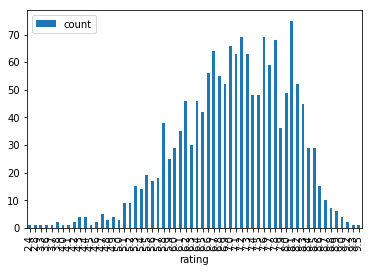

In [45]:
rating_count_pd = details_rating_grouped.toPandas()
rating_count_pd.plot.bar(x = "rating", y = "count")

#### 2.2 Analizando el dataset con Spark SQL (6 punts)


Spark SQL ofrece otro mecanismo para aplicar las transformaciones y obtener resultados similares a los que se obtendría aplicando una consulta SQL como se ha practicado en el ejercicio anterior, mediante la API SparkSQL. Podéis consultar [API de spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html) donde se puede encontrar más información sobre cómo utilizar las diferentes transformaciones sobre tablas.


Por ejemplo, la siguiente consulta nos permite obtener todas las películas que tienen una nota superior a 8 tal y como se ha hecho en el ejercicio anterior sin usar una consulta sql literal:
````
movie_details.where("rating>=8").select("movie_id, rating")
````

A continuación uno planteamos unos ejercicios para que utilice la API SparkSQL, una de las más utilizadas actualmente en el mundo de la ingeniería de datos.
Los ejercicios que se plantean son muy típicos de un proyecto de definición de indicadores, por ejemplo. En este caso, son una serie de indicadores relativos a la actividad de los usuarios y su valoración de las películas.

Podéis utilizar las transformaciones "where", "select" (o "selectExpr"), "groupBy", "count", "agg" y "orderBy".

##### 2.2.1 ¿Cuál es el usuario que ha escrito más reviews? ¿Y lo que ha escrito menos (en caso de que haya más de uno indica cuántos hay)?

A continuación se pide que encontréis el usuario que ha escrito más reviews:

In [46]:
movie_reviews.show()

+----------+---------+----------------+--------------------+--------------------+----------+------+
|is_spoiler| movie_id|     review_date|      review_summary|         review_text|   user_id|rating|
+----------+---------+----------------+--------------------+--------------------+----------+------+
|      true|tt0111161|10 February 2006|A classic piece o...|In its Oscar year...| ur1898687|    10|
|      true|tt0111161|6 September 2000|Simply amazing. T...|The Shawshank Red...| ur0842118|    10|
|      true|tt0111161|1 September 2002|Busy dying or bus...|**Yes, there are ...| ur1003471|    10|
|      true|tt0111161| 4 February 2012|Movie you can see...|I made my account...|ur31182745|    10|
|      true|tt0111161| 24 October 2008|The Shawshank Red...|A friend of mine ...| ur9871443|    10|
|      true|tt0111161|    30 July 2011|"I'm a convicted ...|Well I guess I'm ...| ur2707735|    10|
|      true|tt0111161|     1 June 2010|Blatantly Simple,...|To tell the truth...|ur23169472|    10|


In [47]:
movie_reviews.groupBy("user_id").agg({"movie_id":"count"}).orderBy("count(movie_id)", ascending=False).show(10)
# Ha sido ur2898520 quien más reviews ha escrito.

+----------+---------------+
|   user_id|count(movie_id)|
+----------+---------------+
| ur2898520|           1303|
| ur4248714|           1021|
| ur0453068|            806|
|ur60028700|            770|
|ur20552756|            755|
| ur4888011|            701|
| ur2488512|            681|
| ur1234929|            680|
| ur1293485|            660|
| ur0482513|            641|
+----------+---------------+
only showing top 10 rows



In [50]:
review_counter_user=movie_reviews.groupBy("user_id").agg({"movie_id":"count"}).orderBy("count(movie_id)", ascending = True)

In [51]:
review_counter_user.show()

+----------+---------------+
|   user_id|count(movie_id)|
+----------+---------------+
| ur1153990|              1|
| ur1430482|              1|
| ur1103899|              1|
|ur48823143|              1|
|ur21059122|              1|
|ur39026579|              1|
|ur73297517|              1|
|ur47125783|              1|
| ur2916055|              1|
|ur81573403|              1|
|ur27508189|              1|
|ur69130034|              1|
|ur47738038|              1|
|ur80541192|              1|
|ur56009258|              1|
|ur44809077|              1|
|ur65947123|              1|
|ur66404918|              1|
| ur3181746|              1|
|ur51028935|              1|
+----------+---------------+
only showing top 20 rows



Como se puede ver, hay bastantes que comparten el número mínimo de valoraciones. Ahora se pide que calcule cuántos usuarios comparten la mínima:

In [52]:
review_count=movie_reviews.groupBy("user_id").agg({"movie_id":"count"}).orderBy("count(movie_id)").withColumnRenamed("count(movie_id)", "review_count")

In [53]:
review_count.where("review_count == 1").count()

202194

Observad cómo en este ejercicio hemos introducido una funcionalidad que es de mucha utilidad al transformar datos:
````
.withColumnRenamed("count(movie_id)", "review_count")
````
Esto nos permite cambiar columnas de nombre y suele ser muy útil cuando se trabaja con agregaciones, ya que por defecto Spark añade el nombre de la función de agregación y la columna.

##### 2.2.2 ¿Cuál es el usuario que ha escrito más reviews con spoiler?

De forma similar a la anterior, ahora querremos saber cuál es el usuario que ha escrito más reviews que contenían contenido etiquetado como 'spoiler'.

In [54]:
#Volem filtrar per aqueslls que el camp spoiler es True.
movie_reviews.where("is_spoiler == True").groupBy("user_id").agg({"is_spoiler":"count"}).orderBy("count(is_spoiler)", ascending = False).show(10)

+----------+-----------------+
|   user_id|count(is_spoiler)|
+----------+-----------------+
| ur4248714|             1019|
|ur60028700|              767|
| ur5291991|              540|
| ur7813355|              503|
|ur22668817|              473|
| ur2079400|              454|
| ur2707735|              441|
|ur45215448|              422|
|ur13977076|              417|
| ur1697212|              415|
+----------+-----------------+
only showing top 10 rows



##### 2.2.3 ¿Existe alguna inconsistencia entre los ratings del archivo de detalles y el archivo de reviews?

Éste es un ejercicio más complejo y muy relacionado con la calidad de los datos. Entendemos por inconsistencia que el promedio de 'ratings' de las películas del dataset 'movie details' no se corresponda con el promedio de notas del archivo 'reviews'. Así, se pide que calculéis este promedio y lo comparéis con el que se obtiene del archivo details. Cread una nueva columna en el dataset que muestre la diferencia en valor absoluto y ordenad por esta columna en orden descendente. Esto nos permitirá ver qué películas tienen mayores inconsistencias entre ambos valores.

Inicialmente seleccionaremos el movieID y su valoración del archivo movie_details. Hay que tener en cuenta que el tipo de rating es string, por lo que es necesario convertirlo a double.

In [55]:
from pyspark.sql.types import DoubleType
rating_movies_from_details_file=movie_details.select("movie_id","rating").withColumn("ratingD", movie_details["rating"].cast(DoubleType())).select("movie_id","ratingD")

#Hem convertit el tipus rating a double, ja que es un valor string i no ens permetria realitzar operacions aritmètiques.

Aquí hemos introducido una nueva funcionalidad muy útil,
````
.withColumn("ratingD", movie_details["rating"].cast(DoubleType()))
````
Es una utilidad clave ya que habitualmente cuando se manipulan datasets hace falta ir añadiendo columnas y, en muchas ocasiones, son columnas intermedias que no formarán parte del dataset final, pero que contienen operaciones que nos permiten calcular nuevas columnas con nuevos valores.

Ahora queremos calcular la media de valoraciones del otro archivo, el de reviews, que compararemos después con el que tenemos del dataframe rating_movies_from_details_file. De forma similar al caso anterior, debemos convertir el tipo de rating a Double, ya que es un string y tampoco nos permite realizar operaciones aritméticas.

In [56]:
rating_reviews=movie_reviews.withColumn("ratingD", movie_reviews["rating"].cast(DoubleType())).select("movie_id","ratingD").groupBy("movie_id").agg({"ratingD":"avg"}).orderBy("avg(ratingD)", ascending=False).withColumnRenamed("avg(ratingD)", "avg_ratings")

Explorad los dos dataframes que hemos creado mediante show().

In [57]:
rating_movies_from_details_file.show()

+---------+-------+
| movie_id|ratingD|
+---------+-------+
|tt0099077|    7.8|
|tt0455944|    7.2|
|tt1661199|    7.0|
|tt1659337|    8.0|
|tt0106918|    6.8|
|tt0120201|    7.2|
|tt0122718|    6.1|
|tt0418279|    7.1|
|tt0112462|    5.4|
|tt0435705|    6.2|
|tt3501632|    8.1|
|tt0215750|    7.6|
|tt0371724|    6.8|
|tt0395699|    5.6|
|tt0055630|    8.3|
|tt0365748|    8.0|
|tt0099685|    8.7|
|tt3170832|    8.2|
|tt1119646|    7.7|
|tt0486583|    5.6|
+---------+-------+
only showing top 20 rows



In [58]:
rating_reviews.show()

+---------+-----------------+
| movie_id|      avg_ratings|
+---------+-----------------+
|tt0388795| 9.79700272479564|
|tt0080684|9.501246882793017|
|tt0054215| 9.40389294403893|
|tt0103064|           9.3936|
|tt0088763|9.392241379310345|
|tt0111161|9.297867461591379|
|tt0986264|9.251677852348994|
|tt0036868| 9.23469387755102|
|tt0060196| 9.20055325034578|
|tt0082096|9.195530726256983|
|tt0073195| 9.17684887459807|
|tt0092005|9.166666666666666|
|tt0095016|9.165816326530612|
|tt0021749|9.161290322580646|
|tt0095327|9.143518518518519|
|tt0101414|9.134426229508197|
|tt0019254| 9.13076923076923|
|tt5867800|            9.125|
|tt0476735| 9.10958904109589|
|tt0050083|9.097161572052402|
+---------+-----------------+
only showing top 20 rows



Ahora queremos hacer un join entre los dos dataframes, que debe permitirnos comparar los ratings de los dos dataframes. Observa que en la siguiente celda cambiaremos la notación de selección de campos. En lugar de seleccionar los campos con los valores textuales ("movie_id"), podemos seleccionar el campo utilizando el nombre del dataframe y añadiendo el nombre de la columna mediante un punto.

Por ejemplo:
````
rating_reviews.movie_id
````
Podéis trabajar como os sea más fácil y práctico.

In [59]:
joined=rating_movies_from_details_file.join(rating_reviews, rating_movies_from_details_file.movie_id == rating_reviews.movie_id, 'inner').select(rating_reviews.movie_id, rating_movies_from_details_file.ratingD, rating_reviews.avg_ratings)

In [60]:
joined.show()

+---------+-------+-----------------+
| movie_id|ratingD|      avg_ratings|
+---------+-------+-----------------+
|tt0388795|    7.7| 9.79700272479564|
|tt0080684|    8.8|9.501246882793017|
|tt0054215|    8.5| 9.40389294403893|
|tt0103064|    8.5|           9.3936|
|tt0088763|    8.5|9.392241379310345|
|tt0111161|    9.3|9.297867461591379|
|tt0986264|    8.5|9.251677852348994|
|tt0036868|    8.1| 9.23469387755102|
|tt0060196|    8.9| 9.20055325034578|
|tt0082096|    8.4|9.195530726256983|
|tt0073195|    8.0| 9.17684887459807|
|tt0092005|    8.1|9.166666666666666|
|tt0095016|    8.2|9.165816326530612|
|tt0021749|    8.6|9.161290322580646|
|tt0095327|    8.5|9.143518518518519|
|tt0101414|    8.0|9.134426229508197|
|tt0019254|    8.2| 9.13076923076923|
|tt5867800|    9.5|            9.125|
|tt0476735|    8.5| 9.10958904109589|
|tt0050083|    8.9|9.097161572052402|
+---------+-------+-----------------+
only showing top 20 rows



Por último, calcularemos la diferencia entre los valores que tenemos en el dataframe joined.

In [69]:
from pyspark.sql.functions import abs
#Hem important la funció abs. En exercicis següents n'importarem altres.

joined_relative_diff=joined.withColumn("relative_diff",joined.ratingD-joined.avg_ratings)

#A joined relative tenim valors relatius, positius i negatius. Apliquem la funció abs per a crear una columna més que ens permeti obtenir el valor absolut.

joined_absolute_diff=joined_relative_diff.withColumn("abs_difference",abs(joined_relative_diff.relative_diff)).orderBy("abs_difference", ascending=False)

Mostrad los resultados:

In [70]:
joined_absolute_diff.show()

+---------+-------+------------------+------------------+------------------+
| movie_id|ratingD|       avg_ratings|     relative_diff|    abs_difference|
+---------+-------+------------------+------------------+------------------+
|tt2488496|    8.0|2.5926928281461437| 5.407307171853857| 5.407307171853857|
|tt2527336|    7.5| 2.938775510204082| 4.561224489795919| 4.561224489795919|
|tt0816692|    8.6| 4.241519674355495| 4.358480325644504| 4.358480325644504|
|tt1375666|    8.8| 4.832402234636872| 3.967597765363129| 3.967597765363129|
|tt0266697|    8.1|  4.27364185110664|  3.82635814889336|  3.82635814889336|
|tt1392170|    7.2|3.4714285714285715|3.7285714285714286|3.7285714285714286|
|tt0361748|    8.3| 4.701262272089761|3.5987377279102395|3.5987377279102395|
|tt0416449|    7.7| 4.287292817679558|3.4127071823204425|3.4127071823204425|
|tt2543164|    8.0|  4.59781121751026|3.4021887824897403|3.4021887824897403|
|tt1392190|    8.1| 4.703804347826087|3.3961956521739127|3.3961956521739127|

##### 2.2.4 De las películas de Acción, ¿cuál es la relación entre el número de spoilers respecto al total?

Entendemos como 'relación' el resultado de la división del número de películas con spoiler respecto al total de películas, en este caso, sólo las de género acción. Aclaración: Una película puede pertenecer a más de un género. En este caso, contaremos todas las películas que tengan el género de Acción como uno de los géneros, aunque tengan otros.
A partir de ahora utilizaremos de forma más intensa las funciones de Spark: https://spark.apache.org/docs/latest/api/sql/

El género lo tenemos en el archivo details, mientras que la información relativa a los spoilers la tenemos en el archivo reviews, por lo que habrá que hacer un join de ambos dataframes de nuevo.

In [14]:
from pyspark.sql import functions as F
# las Functions de Spark son un conjunto de utilidades extensa que permite realizar múltiples operaciones sobre los dataframes.
total_action_movies=movie_details.select("movie_id",F.explode("genre").alias("genre")).join(movie_reviews, movie_details.movie_id == movie_reviews.movie_id).where("genre=='Action'")

In [82]:
#Ara recupereu el nombre de pelicules d'Acció i els assignem a la variable total_action_movies
total_action_movies_count=total_action_movies.count()

Tomad nota de la función
````
F.explode("género")
````
porque será necesario utilizarla más veces a lo largo del ejercicio.


Necesitamos ahora obtener el número de películas con Spoiler:

In [88]:
total_action_movies_count_spolier = total_action_movies.where("is_spoiler == True").count()
total_action_movies_count_spolier

53897

Calcula la relación entre el número de películas con spoiler sobre el total a partir de las dos variables calculadas: total_action_movies_count y total_action_movies_count_spolier


In [90]:
total_action_movies_count_spolier/total_action_movies_count

0.2826019704588474

In [ ]:
# Un 28% de las películas de acción contienen spoilers respecto del total de películas.


##### 2.2.5 ¿Cuál es la media de antigüedad de las películas? ¿Y cuál es la diferencia (en número absoluto) media de la antigüedad de las películas de acción y las de terror (Horror)?

En este ejercicio queremos saber cuál es la antigüedad media de las películas (en años), tomando como referencia el release date respecto a la fecha actual. El resultado que se muestre debe ser en años.

Tal y como nos ha pasado antes con los ratings, es necesario cambiar el formato de release date a date, ya que es un string y Spark no sabe cómo operar con ellos. De modo que haremos uso de una nueva función de Spark:
to_date() sobre el campo release date.

In [15]:
movie_details_dates=movie_details.withColumn('converted_date', F.to_date(movie_details.release_date))

In [95]:
movie_details_dates.printSchema()

root
 |-- duration: string (nullable = true)
 |-- genre: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- movie_id: string (nullable = true)
 |-- plot_summary: string (nullable = true)
 |-- plot_synopsis: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- converted_date: date (nullable = true)



Ejecute la siguiente celda. Veréis que hemos introducido nuevas funciones para manipular campos del dataframe:
````
col: nos permite seleccinar columnas.
current_date() nos devuelve la fecha actual.
datediff() calcula la diferencia entre dos fechas.
````


In [102]:
movies_age=movie_details_dates.select(
      F.col("*"),
      F.current_date().alias("current_date"),
      F.datediff(F.current_date(),F.col("converted_date")).alias("datediff") # He añadido "F." delante de current_date() en esta linea y 
                                                                             # delante de col("converted_date") ya que son atributos del 
                                                                             # objeto F importado.
    ).agg({"datediff":"avg"})

El comando ejecutado podría haberse construido de formas diferentes, el objetivo es que pueda explorar la potencialidad de SparkSQL, que actualmente es la herramienta primordial de procesado de datos e ingeniería de datos.
Este comando debe devolvernos la media de antigüedad de las películas en días.

Explorad el dataframe resultante:

In [101]:
movies_age.show()

+-----------------+
|    avg(datediff)|
+-----------------+
|8586.677707006369|
+-----------------+



Capturad el dataframe resultante en un array mediante collect(). ¿Cuántos elementos tiene el dataframe?

In [103]:
age=movies_age.collect()

Ahora es necesario tomar el valor numérico del número de días de antigüedad media y dividirlo por 365, que nos devolverá el promedio de años.

In [104]:
years_age=age[0][0]/365

In [105]:
age

[Row(avg(datediff)=8586.677707006369)]

In [106]:
age[0]

Row(avg(datediff)=8586.677707006369)

In [107]:
age[0][0]

8586.677707006369


Observad cómo hemos tratado el resultado age[0][0]. ¿Qué tipo de objeto es age y porqué lo hemos tratado así?

In [ ]:
# Cómo podemos ver, tenemos una extracción anidada mediante los corchetes. El primer corchete extrae la primer fila con índice 0 
# dentro del objeto age, el segundo corchete actúa sobre esa extracción, es decir, dentro de la fila y extrae el primer elemento, el cuál es
# el valor de avg(datediff) ya que tan solo tenemos una columna y, por lo tanto, la fila tan solo contiene un elemento que volvemos a 
# seleecionar con el índice 0.

El ejercicio para determinar la diferencia por géneros es muy similar, pero añadiendo un criterio de agrupación por 'género'. De modo que en la siguiente celda debe realizar la agrupación por género del promedio de antigüedad de las películas.

Sin embargo, introduciremos una nueva notación para realizar agregaciones, mediante las funciones de SparkSQL que ya hemos utilizado. Observe cómo se ```` F.avg('datediff') ```` respecto a la notación de claves anterior.

In [111]:
movies_age=movie_details_dates.select(
      F.col("*"),
      F.current_date().alias("current_date"),
      F.datediff(F.current_date(),F.col("converted_date")).alias("datediff"))
# He vuelto a recrear movies mediante parte del código anterior ya que la movies_age contiene la agregación de la media y debemos volver a
# instanciarla porque sino tan solo contiene una columna con una fila que es la media de los días que hace que la películas presentes en 
# el dataframe han salido. Ahora movies_age puede ser utilizado en el código siguiente.

In [112]:
movies_age.show()

+--------+--------------------+---------+--------------------+--------------------+------+------------+--------------+------------+--------+
|duration|               genre| movie_id|        plot_summary|       plot_synopsis|rating|release_date|converted_date|current_date|datediff|
+--------+--------------------+---------+--------------------+--------------------+------+------------+--------------+------------+--------+
| 2h 1min|  [Biography, Drama]|tt0099077|1969. Dr. Malcolm...|In 1969, Dr. Malc...|   7.8|  1991-01-11|    1991-01-11|  2024-12-26|   12403|
|2h 12min|[Action, Crime, T...|tt0455944|In The Equalizer,...|Robert McCall (De...|   7.2|  2014-09-26|    2014-09-26|  2024-12-26|    3744|
|1h 45min|[Drama, Family, F...|tt1661199|A girl named Ella...|In a beautiful ki...|   7.0|  2015-03-13|    2015-03-13|  2024-12-26|    3576|
|1h 42min|    [Drama, Romance]|tt1659337|Based on the nove...|The movie opens w...|   8.0|  2012-10-12|    2012-10-12|  2024-12-26|    4458|
|2h 34min|[Dr

In [113]:
movies_age=movies_age.select(F.explode("genre").alias("genre"), "datediff").groupBy("genre").agg(F.avg('datediff'))

Muestrad los resultados mediante un show().

In [114]:
movies_age.show()

+---------+------------------+
|    genre|     avg(datediff)|
+---------+------------------+
|    Crime| 8853.311258278145|
|  Romance| 9016.067510548522|
| Thriller| 8583.478448275862|
|Adventure| 7778.163972286374|
|    Drama| 9140.676286072772|
|      War|          14621.08|
|   Family| 9115.574193548387|
|  Fantasy| 7710.758426966292|
|  History|            9475.5|
|  Mystery| 8024.267080745341|
|  Musical| 9070.333333333334|
|Animation| 7211.511904761905|
|    Music| 8330.588235294117|
|Film-Noir|27429.666666666668|
|   Horror| 7989.370689655172|
|  Western|           13122.2|
|Biography| 7949.633663366337|
|   Comedy| 8654.709923664122|
|   Action| 7375.178082191781|
|    Sport| 8316.333333333334|
+---------+------------------+
only showing top 20 rows




Ahora es necesario seleccionar los géneros para poder comparar ambos valores:

In [120]:
horror_movie_age=movies_age.where("genre=='Horror'").collect()[0][1]
action_movie_age=movies_age.where("genre=='Action'").collect()[0][1]


In [121]:
(horror_movie_age-action_movie_age)/365

1.6827194725024415

##### 2.2.6 ¿Cuál es el usuario que pone mejores valoraciones (media aritmética)? ¿Y el que las pone peores? NOTA: Ignoraremos a los usuarios que han escrito menos de 10 reviews y si hay más de uno, muéstralos todos.

En este ejercicio repetimos ya un patrón de desarrollo muy similar al de ejercicios anteriores. Así que es menos guiado que los demás y queda más abierto a que lo completéis mediante la experiencia de los ejercicios anteriores. Podéis crear las celdas que sean necesarias.

In [135]:
filtered_users = movie_reviews.groupBy("user_id").agg({"*":"count"}).where("count(1) >= 10").orderBy("count(1)", ascending = False).select("user_id")
filtered_users.show()

+----------+
|   user_id|
+----------+
| ur2898520|
| ur4248714|
| ur0453068|
|ur60028700|
|ur20552756|
| ur4888011|
| ur2488512|
| ur1234929|
| ur1293485|
| ur0482513|
|ur17646017|
| ur4445210|
|ur23055365|
| ur5876717|
| ur8503729|
| ur5291991|
| ur7813355|
| ur2093818|
| ur4532636|
| ur1416505|
+----------+
only showing top 20 rows



In [136]:
users_avg_ratings = movie_reviews.join(filtered_users, on = "user_id", how = "inner").groupBy("user_id").agg({"rating":"avg"})
users_avg_ratings.orderBy("avg(rating)", ascending = False).show()
users_avg_ratings.orderBy("avg(rating)", ascending = True).show()

+----------+----------------+
|   user_id|     avg(rating)|
+----------+----------------+
| ur1160611|            10.0|
|ur12386544|            10.0|
|ur52451894|            10.0|
| ur2910379|            10.0|
| ur4063179|            10.0|
|ur16199654|            10.0|
| ur1916349|            10.0|
| ur4736847|            10.0|
| ur1855181|            10.0|
|ur11418162|            10.0|
|ur35855381|            10.0|
|ur22958738|            10.0|
| ur1366284|            10.0|
| ur2094131|            10.0|
| ur1653550|            10.0|
| ur5432147|            10.0|
| ur1140297|            10.0|
|ur23748553|            10.0|
| ur1799755|            10.0|
|ur10774147|9.97872340425532|
+----------+----------------+
only showing top 20 rows

+----------+------------------+
|   user_id|       avg(rating)|
+----------+------------------+
|ur58549266|             1.125|
| ur6314034|1.1304347826086956|
|ur27418145|1.1818181818181819|
|ur17549527|1.2142857142857142|
|ur18145949|              1.25

In [ ]:
# Hay 19 usuarios que tan solo han puesto diez a todas las películas ya que su media es 10, todos ellos aparecen en el primer show().
# Por otro lado, ur58549266 es el que eores notas ha puesto de media, alrededor de 1,125 como podemos ver en el segundo .show()

##### 2.2.7 Mostrad la media de los rating de las películas por género.

De forma similar al ejercicio 2.2.6, aquí se pide que pueda completar el ejercicio sin contenido previo.

In [141]:
movie_details.select(F.col("*"), F.explode("genre").alias("genre_exploded")).groupBy("genre_exploded").agg({"rating":"avg"}).show()

+--------------+------------------+
|genre_exploded|       avg(rating)|
+--------------+------------------+
|         Crime| 7.330794701986752|
|       Romance| 6.949367088607592|
|      Thriller| 7.156896551724139|
|     Adventure| 6.940877598152422|
|         Drama| 7.396737766624849|
|           War| 8.136000000000001|
|        Family| 6.579999999999999|
|       Fantasy| 6.897752808988766|
|       History| 7.613793103448279|
|       Mystery| 7.449689440993788|
|       Musical| 7.108333333333334|
|     Animation| 7.397619047619049|
|         Music| 7.020588235294117|
|     Film-Noir| 8.233333333333334|
|        Horror|  6.63879310344828|
|       Western| 7.959999999999999|
|     Biography| 7.601980198019803|
|        Comedy| 6.713549618320608|
|        Action| 6.795205479452052|
|         Sport|7.0166666666666675|
+--------------+------------------+
only showing top 20 rows



##### 2.2.8 ¿Cuáles son los 10 años con mayor número de películas 'released'?

NOTA: Usad el release date

In [18]:
years = movie_details_dates.groupBy(F.year("converted_date").alias("year")).count().orderBy("year", ascending = False)

In [29]:
from pyspark.sql import Window
spec = Window.orderBy("year").rowsBetween(-9, 0)
years_with_window = years.withColumn("last_10_years", F.sum("count").over(spec)).orderBy("year", ascending = False)
max_last = years_with_window.select(F.max("last_10_years")).collect()[0][0]
years_with_window.filter(F.col("last_10_years") == max_last).show()

+----+-----+-------------+
|year|count|last_10_years|
+----+-----+-------------+
|2017|   69|          533|
+----+-----+-------------+



In [30]:
years_with_window.show()

+----+-----+-------------+
|year|count|last_10_years|
+----+-----+-------------+
|2018|    5|          492|
|2017|   69|          533|
|2016|   50|          519|
|2015|   57|          530|
|2014|   52|          518|
|2013|   52|          520|
|2012|   49|          522|
|2011|   52|          527|
|2010|   53|          524|
|2009|   53|          519|
|2008|   46|          517|
|2007|   55|          520|
|2006|   61|          514|
|2005|   45|          504|
|2004|   54|          507|
|2003|   54|          507|
|2002|   54|          504|
|2001|   49|          494|
|2000|   48|          495|
|1999|   51|          494|
+----+-----+-------------+
only showing top 20 rows



In [ ]:
# Cómo podemos ver, la ventana de tiempo de 10 años consecutivos en los que más películas se han estrenado es entre 2008 y 2017 
# (incluyendo 2017) con 533 películas